In [2]:
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

from tqdm import tqdm

from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings(action='ignore')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [8]:
df = pd.read_csv(r'..\..\..\Data\데이터정리중\재무변수_특수문자 제외.csv', index_col=0) 

In [1]:
df

NameError: name 'df' is not defined

In [10]:
df = df.fillna(0)
df

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,...,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA,부도,년,key,공시제목
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,28990.0,21169.0,10541.0,4330.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,2001.0,588202001,0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,20908.0,16359.0,2307.0,1829.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,2002.0,588202002,0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,15401.0,9880.0,1436.0,355.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,2003.0,588202003,0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,11063.0,8534.0,1083.0,2.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,2004.0,588202004,0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,5179.0,3893.0,445.0,11.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.0,2005.0,588202005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,79137.0,14794.0,12274.0,1440.0,...,55934.79,1348.52,0.94,10.71,89.90,41.48,1.0,2017.0,240602017,0
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,79912.0,15880.0,13124.0,1588.0,...,46036.63,1147.56,0.74,9.02,76.50,40.12,1.0,2018.0,240602018,0
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,75206.0,12515.0,11029.0,4017.0,...,36557.57,1451.79,0.87,16.83,96.79,25.18,1.0,2019.0,240602019,0
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,83661.0,22620.0,19701.0,2318.0,...,78081.78,1009.25,0.67,507.93,67.28,77.37,1.0,2020.0,240602020,0


In [22]:
col = df.columns[6:268].values.tolist()
#col.append('부도')

In [24]:
subset = df[col]
subset

,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기예금_요약_,단기매매증권_요약_,단기대여금_요약_,기타단기투자자산_요약_,매출채권_요약_,...,PCR_Price_cash_flow_ratio__최저_,PSR_Price_sales_ratio__최고_,PSR_Price_sales_ratio__최저_,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA,부도
0,28990.0,21169.0,10541.0,4330.0,4552.0,4539.0,1.0,13.0,0.0,786.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
1,20908.0,16359.0,2307.0,1829.0,18.0,0.0,6.0,13.0,0.0,14.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
2,15401.0,9880.0,1436.0,355.0,246.0,240.0,6.0,0.0,0.0,26.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
3,11063.0,8534.0,1083.0,2.0,381.0,380.0,0.0,0.0,1.0,72.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
4,5179.0,3893.0,445.0,11.0,0.0,0.0,0.0,0.0,0.0,33.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,79137.0,14794.0,12274.0,1440.0,5065.0,0.0,0.0,0.0,5065.0,5158.0,...,35.62,0.43,0.28,55934.79,1348.52,0.94,10.71,89.90,41.48,1.0
27353,79912.0,15880.0,13124.0,1588.0,5058.0,0.0,0.0,0.0,5058.0,6315.0,...,24.31,0.34,0.24,46036.63,1147.56,0.74,9.02,76.50,40.12,1.0
27354,75206.0,12515.0,11029.0,4017.0,5.0,0.0,0.0,0.0,5.0,4403.0,...,7.82,0.40,0.24,36557.57,1451.79,0.87,16.83,96.79,25.18,1.0
27355,83661.0,22620.0,19701.0,2318.0,11472.0,0.0,0.0,0.0,11472.0,5161.0,...,51.31,0.86,0.25,78081.78,1009.25,0.67,507.93,67.28,77.37,1.0


In [25]:
X = subset.drop(columns=['부도'], axis=1)
y = subset['부도']

In [26]:
X.shape

(27357, 261)

In [30]:
#나중에 alpha 조절해보기 
from sklearn import linear_model
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X, y)
print('{:.3f}'.format(lasso.score(X, y)))

0.068


In [33]:
#사용한 변수 개수
print(np.sum(lasso.coef_ != 0))

108


In [104]:
print(lasso.coef_)

[ 3.03262364e-10  0.00000000e+00  0.00000000e+00  8.00240377e-08
 -6.87137418e-09 -0.00000000e+00  3.05439146e-07 -6.01444037e-07
 -0.00000000e+00  8.53683289e-09  3.41342880e-07 -7.37320960e-08
  0.00000000e+00  4.44525486e-08  1.62976643e-07  1.45313884e-07
 -0.00000000e+00 -1.42494464e-07 -1.35732667e-08  0.00000000e+00
  0.00000000e+00  1.63010843e-09  6.06351580e-07  9.73068029e-08
 -3.64600619e-08  1.97677662e-07 -1.09673818e-07 -1.24229401e-07
  7.99534690e-08  8.14842500e-12 -2.89601298e-08 -3.83953591e-07
 -1.01143652e-08  4.25952716e-08  0.00000000e+00 -0.00000000e+00
 -3.16541028e-08  3.17603843e-08 -0.00000000e+00 -1.47980049e-07
 -1.03959429e-07  1.90657545e-07 -3.96007971e-08  7.67173461e-08
  5.42459754e-07 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.64860965e-09  4.00012462e-07 -1.10008707e-07
  2.94149005e-08  1.22615005e-07  0.00000000e+00  1.29786429e-10
  3.87747767e-09 -0.00000000e+00  1.56236063e-07  0.00000000e+00
  3.10561601e-07  0.00000

In [48]:
lasso_coef =lasso.coef_.tolist()
lasso_feature = lasso.feature_names_in_.tolist()

In [52]:
del df_lasso

In [79]:
df_lasso = pd.DataFrame([lasso_feature, lasso_coef])

In [80]:
df_lasso = df_lasso.rename(columns=df_lasso.iloc[0]).drop(df_lasso.index[0]).rename(index={1: 'lasso coef'})

In [81]:
df_lasso

,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기예금_요약_,단기매매증권_요약_,단기대여금_요약_,기타단기투자자산_요약_,매출채권_요약_,...,PCR_Price_cash_flow_ratio__최고_,PCR_Price_cash_flow_ratio__최저_,PSR_Price_sales_ratio__최고_,PSR_Price_sales_ratio__최저_,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA
lasso coef,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.000001,-0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0


In [95]:
lasso_n_0 = df_lasso != 0
lasso_n_0=lasso_n_0.rename(index={'lasso coef' : 'used'})

In [96]:
lasso_n_0

,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기예금_요약_,단기매매증권_요약_,단기대여금_요약_,기타단기투자자산_요약_,매출채권_요약_,...,PCR_Price_cash_flow_ratio__최고_,PCR_Price_cash_flow_ratio__최저_,PSR_Price_sales_ratio__최고_,PSR_Price_sales_ratio__최저_,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA
used,True,False,False,True,True,False,True,True,False,True,...,False,False,False,False,True,True,False,True,True,False


In [103]:
df_lasso = pd.concat([df_lasso, lasso_n_0]).T

In [129]:
#소수점 나타나게 하기
pd.options.display.float_format = '{:.2f}'.format

In [123]:
abs(df_lasso['lasso coef']).sort_values(ascending=False)

종업원1인당_순이익          0.00001847
유동부채비율              0.00000495
사내유보_대_자기자본비율       0.00000364
매입채무회전기간            0.00000300
_계속사업손익_법인세비용_요약_   0.00000216
                       ...    
매출원가_대_매출액비율        0.00000000
유동자산_요약_            0.00000000
영업외손익률              0.00000000
금융비용부담률             0.00000000
EV_EBITDA           0.00000000
Name: lasso coef, Length: 261, dtype: object

In [1]:
lasso_feature = df_lasso[df_lasso['used'] == True].index.tolist()
len(lasso_feature)
lasso_feature

NameError: name 'df_lasso' is not defined

In [125]:
df[lasso_feature]

,자산총계_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기매매증권_요약_,단기대여금_요약_,매출채권_요약_,_할인어음_또는_배서어음_요약_,기타당좌자산_요약_,상품_요약_,제품_요약_,...,부가가치_1,인건비,임차료,감가상각비_1,기계투자효율_1,부가가치율_1,기업가치_EV_,EBITDA,EBITDA_금융비용,EBITDA_평균발행주식수
0,28990.00000000,4330.00000000,4552.00000000,1.00000000,13.00000000,786.00000000,0.00000000,873.00000000,0.00000000,2906.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,20908.00000000,1829.00000000,18.00000000,6.00000000,13.00000000,14.00000000,0.00000000,446.00000000,0.00000000,3550.00000000,...,1831.07000000,1196.41000000,26.03000000,241.31000000,214.85000000,11.57000000,0.00000000,0.00000000,0.00000000,0.00000000
2,15401.00000000,355.00000000,246.00000000,6.00000000,0.00000000,26.00000000,0.00000000,809.00000000,0.00000000,1529.00000000,...,121.48000000,2565.66000000,64.58000000,336.91000000,42.66000000,0.46000000,0.00000000,0.00000000,0.00000000,0.00000000
3,11063.00000000,2.00000000,381.00000000,0.00000000,0.00000000,72.00000000,0.00000000,628.00000000,0.00000000,1958.00000000,...,1858.57000000,1184.75000000,94.37000000,202.85000000,469.87000000,10.69000000,0.00000000,0.00000000,0.00000000,0.00000000
4,5179.00000000,11.00000000,0.00000000,0.00000000,0.00000000,33.00000000,0.00000000,400.00000000,0.00000000,2050.00000000,...,-1965.01000000,495.97000000,37.78000000,194.26000000,-791.34000000,-15.02000000,0.00000000,0.00000000,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,79137.00000000,1440.00000000,5065.00000000,0.00000000,0.00000000,5158.00000000,0.00000000,610.00000000,2519.00000000,0.00000000,...,6993.48000000,3362.28000000,0.00000000,384.73000000,3684.02000000,4.86000000,55934.79000000,1348.52000000,10.71000000,89.90000000
27353,79912.00000000,1588.00000000,5058.00000000,0.00000000,0.00000000,6315.00000000,0.00000000,162.00000000,2756.00000000,0.00000000,...,7031.28000000,3455.91000000,0.00000000,396.07000000,4929.63000000,4.52000000,46036.63000000,1147.56000000,9.02000000,76.50000000
27354,75206.00000000,4017.00000000,5.00000000,0.00000000,0.00000000,4403.00000000,0.00000000,2604.00000000,1486.00000000,0.00000000,...,7373.52000000,3500.30000000,0.00000000,359.35000000,3064.10000000,4.44000000,36557.57000000,1451.79000000,16.83000000,96.79000000
27355,83661.00000000,2318.00000000,11472.00000000,0.00000000,0.00000000,5161.00000000,0.00000000,750.00000000,2919.00000000,0.00000000,...,15072.74000000,3345.25000000,0.00000000,508.49000000,3489.21000000,10.00000000,78081.78000000,1009.25000000,507.93000000,67.28000000


In [127]:
df

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,...,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA,부도,년,key,공시제목
0,(주)CMG제약,58820.00000000,2000/12,5.00000000,0,UQ,28990.00000000,21169.00000000,10541.00000000,4330.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,2001.00000000,588202001,0
1,(주)CMG제약,58820.00000000,2001/12,5.00000000,0,UQ,20908.00000000,16359.00000000,2307.00000000,1829.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,2002.00000000,588202002,0
2,(주)CMG제약,58820.00000000,2002/12,5.00000000,0,UQ,15401.00000000,9880.00000000,1436.00000000,355.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,2003.00000000,588202003,0
3,(주)CMG제약,58820.00000000,2003/12,5.00000000,0,UQ,11063.00000000,8534.00000000,1083.00000000,2.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,2004.00000000,588202004,0
4,(주)CMG제약,58820.00000000,2004/12,5.00000000,0,UQ,5179.00000000,3893.00000000,445.00000000,11.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,2005.00000000,588202005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.00000000,2016/12,5.00000000,0,UQ,79137.00000000,14794.00000000,12274.00000000,1440.00000000,...,55934.79000000,1348.52000000,0.94000000,10.71000000,89.90000000,41.48000000,1.00000000,2017.00000000,240602017,0
27353,흥구석유(주),24060.00000000,2017/12,5.00000000,0,UQ,79912.00000000,15880.00000000,13124.00000000,1588.00000000,...,46036.63000000,1147.56000000,0.74000000,9.02000000,76.50000000,40.12000000,1.00000000,2018.00000000,240602018,0
27354,흥구석유(주),24060.00000000,2018/12,5.00000000,0,UQ,75206.00000000,12515.00000000,11029.00000000,4017.00000000,...,36557.57000000,1451.79000000,0.87000000,16.83000000,96.79000000,25.18000000,1.00000000,2019.00000000,240602019,0
27355,흥구석유(주),24060.00000000,2019/12,5.00000000,0,UQ,83661.00000000,22620.00000000,19701.00000000,2318.00000000,...,78081.78000000,1009.25000000,0.67000000,507.93000000,67.28000000,77.37000000,1.00000000,2020.00000000,240602020,0


In [130]:
pd.concat ([df.iloc[:,0:6], df[lasso_feature], df.iloc[:, -4:]],axis=1)

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,현금_및_현금성자산_요약_,단기투자자산_요약_,단기매매증권_요약_,...,기계투자효율_1,부가가치율_1,기업가치_EV_,EBITDA,EBITDA_금융비용,EBITDA_평균발행주식수,부도,년,key,공시제목
0,(주)CMG제약,58820.00,2000/12,5.00,0,UQ,28990.00,4330.00,4552.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2001.00,588202001,0
1,(주)CMG제약,58820.00,2001/12,5.00,0,UQ,20908.00,1829.00,18.00,6.00,...,214.85,11.57,0.00,0.00,0.00,0.00,1.00,2002.00,588202002,0
2,(주)CMG제약,58820.00,2002/12,5.00,0,UQ,15401.00,355.00,246.00,6.00,...,42.66,0.46,0.00,0.00,0.00,0.00,1.00,2003.00,588202003,0
3,(주)CMG제약,58820.00,2003/12,5.00,0,UQ,11063.00,2.00,381.00,0.00,...,469.87,10.69,0.00,0.00,0.00,0.00,1.00,2004.00,588202004,0
4,(주)CMG제약,58820.00,2004/12,5.00,0,UQ,5179.00,11.00,0.00,0.00,...,-791.34,-15.02,0.00,0.00,0.00,0.00,1.00,2005.00,588202005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.00,2016/12,5.00,0,UQ,79137.00,1440.00,5065.00,0.00,...,3684.02,4.86,55934.79,1348.52,10.71,89.90,1.00,2017.00,240602017,0
27353,흥구석유(주),24060.00,2017/12,5.00,0,UQ,79912.00,1588.00,5058.00,0.00,...,4929.63,4.52,46036.63,1147.56,9.02,76.50,1.00,2018.00,240602018,0
27354,흥구석유(주),24060.00,2018/12,5.00,0,UQ,75206.00,4017.00,5.00,0.00,...,3064.10,4.44,36557.57,1451.79,16.83,96.79,1.00,2019.00,240602019,0
27355,흥구석유(주),24060.00,2019/12,5.00,0,UQ,83661.00,2318.00,11472.00,0.00,...,3489.21,10.00,78081.78,1009.25,507.93,67.28,1.00,2020.00,240602020,0


In [131]:
df_ultimo = pd.concat ([df.iloc[:,0:6], df[lasso_feature], df.iloc[:, -4:]],axis=1)
df_ultimo.to_csv('feature_selection_LASSO_108.csv')

## 접어주세용

In [27]:
"""
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=False, max_features=20)
model.fit(X,y)
X_new = model.transform(X)
X_new.shape 
"""

'\nlsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)\nmodel = SelectFromModel(lsvc, prefit=False, max_features=20)\nmodel.fit(X,y)\nX_new = model.transform(X)\nX_new.shape \n'

In [200]:
cols = np.array(subset.columns[:-1])
cef = model.estimator_.coef_[0]

In [201]:
samples = np.array([cols.tolist(), cef.tolist()]).transpose()
samples.shape

(261, 2)

In [202]:
lasso_df_ = pd.DataFrame(model.estimator_.coef_, columns= [cols.tolist()])
lasso_df_

,자산총계(요약),유동자산(요약),당좌자산(요약),현금 및 현금성자산(요약),단기투자자산(요약),단기예금(요약),단기매매증권(요약),단기대여금(요약),기타단기투자자산(요약),매출채권(요약),...,PCR(Price cash-flow ratio)(최고),PCR(Price cash-flow ratio)(최저),PSR(Price sales ratio)(최고),PSR(Price sales ratio)(최저),기업가치(EV),EBITDA,EBITDA/매출액,EBITDA/금융비용,EBITDA/평균발행주식수,EV/EBITDA
0,-1.281684e-07,0.000002,-0.000002,0.000003,0.000008,9.159958e-07,1.345562e-07,-0.000013,-0.000002,-5.697494e-07,...,-0.000013,0.000029,-0.000193,0.002707,-2.905858e-08,-0.000001,0.000675,-4.772838e-08,0.000003,-0.000008


In [204]:
subset_1 = lasso_df_[model.get_feature_names_out().tolist()].transpose()
subset_1

,0
매출액총이익률,-0.002283
기업경상이익률 (2007년 이전 발생),0.002432
경영자본영업이익률,0.001141
매출원가 대 매출액비율,-0.001620
광고선전비 대 매출액비율,0.001363
인건비 대 총비용비율,0.001755
금융비용 대 총비용비율,-0.005073
감가상각비 대 총비용비율,0.013317
차입금평균이자율,0.001406
사내유보율,0.003419


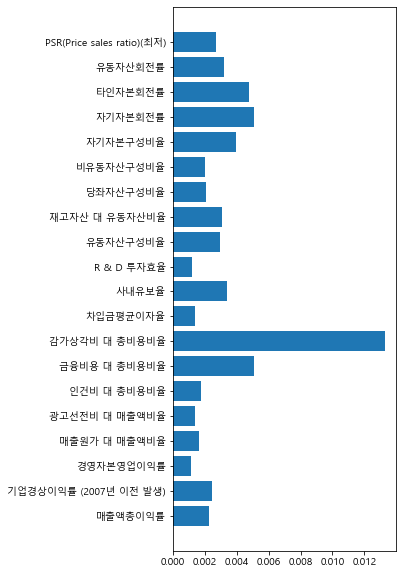

In [231]:
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (4, 10)

plt.barh(width= abs(subset_1[0].values), y= model.get_feature_names_out())
plt.show()

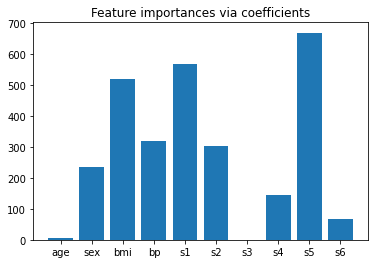

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
feature_names

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
      dtype='<U3')